#MULAI GET DATA & NOISE HANDLING

In [1]:
#general purpose packages
import numpy as np
import pandas as pd


!pip install emoji
from nltk.corpus import stopwords
import nltk
import re
import string

seed = 42
# Download the 'stopwords' dataset
nltk.download('stopwords')


#data processing
import re, string
import emoji # Import the emoji module
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
# Word Cloud
from wordcloud import WordCloud
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import re
import nltk

nltk.download('stopwords')

!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 8.1 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00


#PREPROCESS & SPLIT DATASET TRAIN,VALIDATION, TESTING

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Read CSV file into DataFrame
df = pd.read_csv('/content/drive/MyDrive/Thesis/Thesis_preprocess_final_202504.csv', sep=';', quoting=1)

Mounted at /content/drive


/tmp/ipython-input-4071843667.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


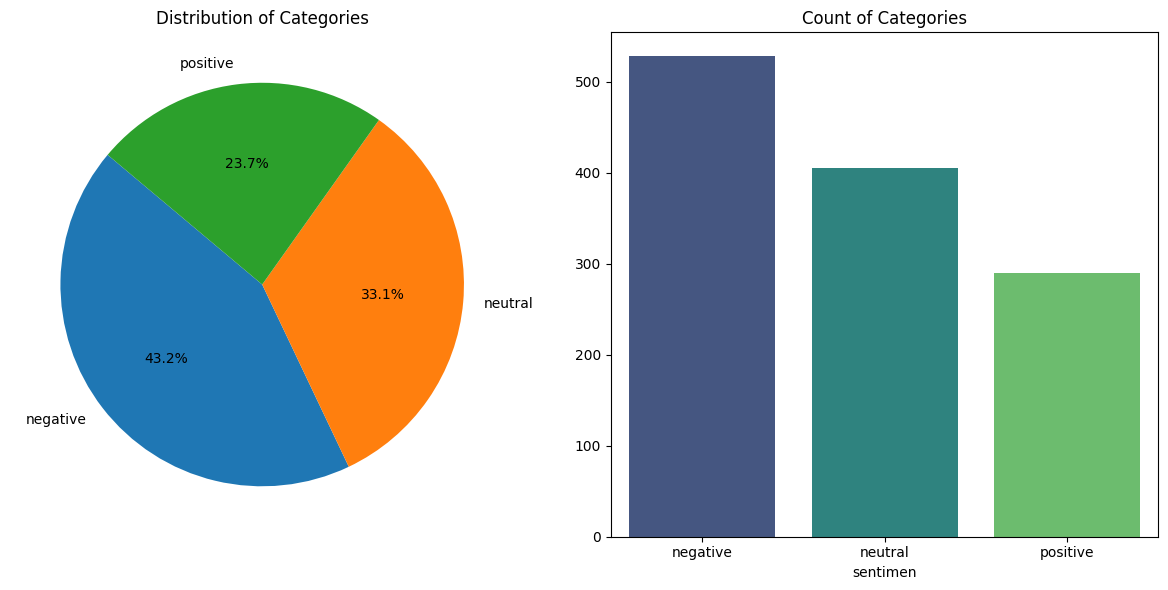

In [3]:
# Value Count Of Label
count = df['sentimen'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
X = df['text_clean']
y = df['sentimen']

from sklearn.model_selection import train_test_split

# Train-Test Split (80% Train, 20% Test)
X_train_1st, X_test, y_train_1st, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

# Train-Validation Split (75% Train dari Train, 25% Validation dari Train)
X_train_ori, X_valid, y_train_ori, y_valid = train_test_split(X_train_1st, y_train_1st, test_size=0.25, random_state=seed, stratify=y_train_1st)

# X_train_ori dan y_train_ori untuk pelatihan model biasa (belum di augmentasi)

# Print the shapes of the training and testing sets
print("X_train ori shape:", X_train_ori.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)
print("y_train ori shape:", y_train_ori.shape)
print("y_valid shape:", y_valid.shape)
print("y_test shape:", y_test.shape)

X_train ori shape: (733,)
X_valid shape: (245,)
X_test shape: (245,)
y_train ori shape: (733,)
y_valid shape: (245,)
y_test shape: (245,)


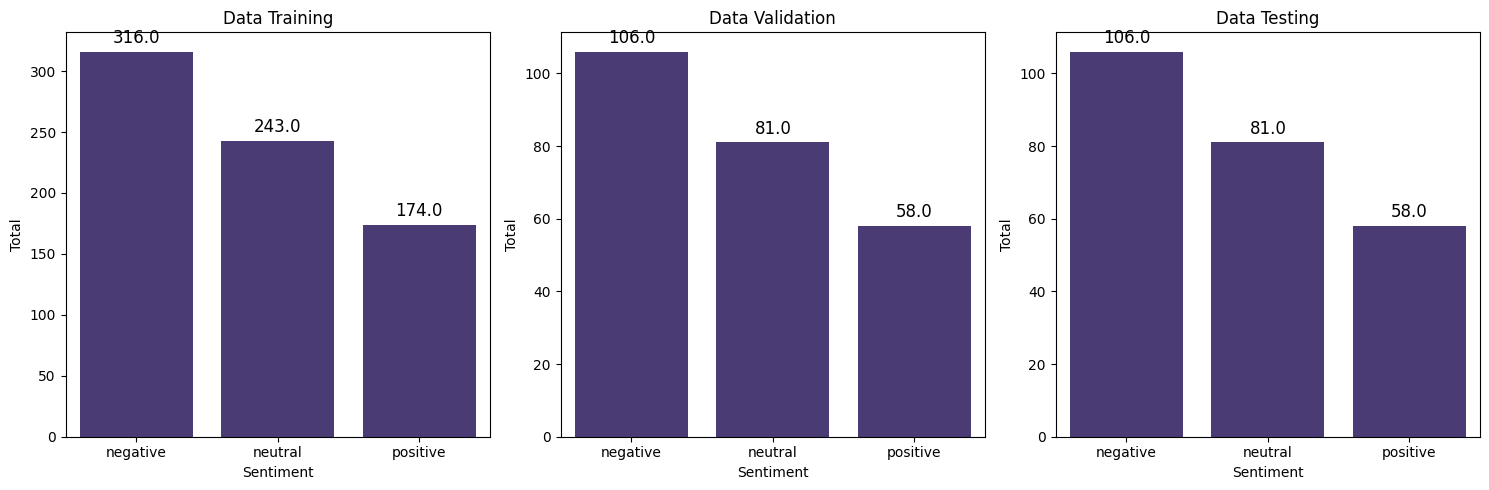

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Membuat subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


# Tentukan urutan kategori yang diinginkan
sentiment_order = ["negative", "neutral", "positive"]

# Konversi label ke kategori dengan urutan tertentu
y_train_ori_plot = pd.Series(y_train_ori, dtype=pd.CategoricalDtype(categories=sentiment_order, ordered=True))
y_valid_plot = pd.Series(y_valid.squeeze(), dtype=pd.CategoricalDtype(categories=sentiment_order, ordered=True))
y_test_plot = pd.Series(y_test, dtype=pd.CategoricalDtype(categories=sentiment_order, ordered=True))


# Plot distribusi sentimen pada Train
sns.countplot(x=y_train_ori_plot,  order=sentiment_order, ax=axes[0])
axes[0].set_title('Data Training')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Total')

# Menambahkan label pada batang di Train
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Plot distribusi sentimen pada Validation
sns.countplot(x=y_valid_plot, order=sentiment_order, ax=axes[1])
axes[1].set_title('Data Validation')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Total')

# Menambahkan label pada batang di Validation
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Plot distribusi sentimen pada Test
sns.countplot(x=y_test_plot, order=sentiment_order, ax=axes[2])
axes[2].set_title('Data Testing')
axes[2].set_xlabel('Sentiment')
axes[2].set_ylabel('Total')


# Menambahkan label pada batang di Test
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Menampilkan plot
plt.tight_layout()
plt.show()


#RUN MODEL BEFORE BACK TRANSLATION

In [6]:
import time
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore", message="cannot use tree with sparse input")

# Param grids dan data tetap sama seperti sebelumnya...
# Parameter grid manual untuk masing-masing model
param_grids = {
    'Naive Bayes': {
        'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'naive_bayes__alpha': [0.1, 0.5, 1.0, 2.0]
    },
    'SVM': {
        'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'svm__C': [0.1, 1, 10, 100],
        'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'svm__degree': [2, 3, 4]
    },
    'KNN': {
        'vectorizer__ngram_range': [(1, 1), (1, 2)],
        'knn__n_neighbors': [3, 5, 7, 10],
        'knn__weights': ['uniform', 'distance'],
        'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'knn__p': [1, 2]
    }
}


results = []
best_pipelines = {}  # Simpan pipeline terbaik per model

def evaluate_model(name, y_true, y_pred, params, pipeline):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    result = {
        'Model': name,
        'Akurasi': round(acc * 100, 2),
        'Presisi': round(prec * 100, 2),
        'Recall': round(rec * 100, 2),
        'F1-Score': round(f1 * 100, 2),
        'Parameter': params,
        'Train Time (s)': round(train_time, 4),  # catat waktu training
        'Pipeline': pipeline  # Simpan pipeline
    }
    results.append(result)

# ==========================
# TRAINING DENGAN VALIDASI
# ==========================

# NAIVE BAYES
print("Training Naive Bayes with manual search...")
for ngram in param_grids['Naive Bayes']['vectorizer__ngram_range']:
    for alpha in param_grids['Naive Bayes']['naive_bayes__alpha']:
        pipe = Pipeline([
            ('vectorizer', CountVectorizer(ngram_range=ngram)),
            ('naive_bayes', MultinomialNB(alpha=alpha))
        ])
        start = time.time()
        pipe.fit(X_train_ori, y_train_ori)
        end = time.time()
        train_time = end - start
        y_pred = pipe.predict(X_valid)
        params = {'ngram_range': ngram, 'alpha': alpha}
        evaluate_model('Naive Bayes', y_valid, y_pred, params, pipe)

# SVM
print("Training SVM with manual search...")
for ngram in param_grids['SVM']['vectorizer__ngram_range']:
    for C in param_grids['SVM']['svm__C']:
        for kernel in param_grids['SVM']['svm__kernel']:
            if kernel == 'poly':
                for degree in param_grids['SVM']['svm__degree']:
                    pipe = Pipeline([
                        ('vectorizer', CountVectorizer(ngram_range=ngram)),
                        ('svm', SVC(C=C, kernel=kernel, degree=degree))
                    ])
                    pipe.fit(X_train_ori, y_train_ori)
                    y_pred = pipe.predict(X_valid)
                    params = {'ngram_range': ngram, 'C': C, 'kernel': kernel, 'degree': degree}
                    evaluate_model('SVM', y_valid, y_pred, params, pipe)
            else:
                pipe = Pipeline([
                    ('vectorizer', CountVectorizer(ngram_range=ngram)),
                    ('svm', SVC(C=C, kernel=kernel))
                ])
                start = time.time()
                pipe.fit(X_train_ori, y_train_ori)
                end = time.time()
                train_time = end - start
                y_pred = pipe.predict(X_valid)
                params = {'ngram_range': ngram, 'C': C, 'kernel': kernel}
                evaluate_model('SVM', y_valid, y_pred, params, pipe)

# KNN
print("Training KNN with manual search...")
for ngram in param_grids['KNN']['vectorizer__ngram_range']:
    for n_neighbors in param_grids['KNN']['knn__n_neighbors']:
        for weights in param_grids['KNN']['knn__weights']:
            for algorithm in param_grids['KNN']['knn__algorithm']:
                for p in param_grids['KNN']['knn__p']:
                    pipe = Pipeline([
                        ('vectorizer', CountVectorizer(ngram_range=ngram)),
                        ('knn', KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p))
                    ])
                    try:
                        start = time.time()
                        pipe.fit(X_train_ori, y_train_ori)
                        end = time.time()
                        train_time = end - start
                        y_pred = pipe.predict(X_valid)
                        params = {
                            'ngram_range': ngram,
                            'n_neighbors': n_neighbors,
                            'weights': weights,
                            'algorithm': algorithm,
                            'p': p
                        }
                        evaluate_model('KNN', y_valid, y_pred, params, pipe)
                    except Exception as e:
                        print(f"Error with KNN params {params}: {e}")

# ==========================
# SELEKSI & EVALUASI DI TEST
# ==========================

# Asumsikan `results` sudah terisi dari fungsi evaluate_model
df_results = pd.DataFrame(results)

# Ambil satu hasil terbaik per model (berdasarkan F1-score tertinggi)
df_results_sorted = df_results.sort_values(by='F1-Score', ascending=False)
# Ambil satu hasil terbaik per model (berdasarkan F1-score tertinggi)
df_best_per_model = df_results.sort_values(by='F1-Score', ascending=False).drop_duplicates(subset='Model')

# Urutkan ulang berdasarkan F1-score untuk tampilan yang rapi
df_best_per_model_sorted = df_best_per_model.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

# Tampilkan hasil terbaik per model
print("\nHasil terbaik masing-masing model:")
print(df_best_per_model_sorted[['Model', 'F1-Score', 'Parameter']])




Training Naive Bayes with manual search...
Training SVM with manual search...
Training KNN with manual search...

Hasil terbaik masing-masing model:
         Model  F1-Score                                          Parameter
0  Naive Bayes     79.08              {'ngram_range': (1, 2), 'alpha': 0.1}
1          SVM     76.83  {'ngram_range': (1, 2), 'C': 1, 'kernel': 'sig...
2          KNN     64.62  {'ngram_range': (1, 1), 'n_neighbors': 10, 'we...


In [7]:
df_results_sorted.to_excel("hasil_evaluasi_model_before.xlsx", index=False)


In [8]:
# Ambil pipeline terbaik dari setiap model
best_pipelines = {}
for model_name in df_results_sorted['Model'].unique():
    best_row = df_results_sorted[df_results_sorted['Model'] == model_name].iloc[0]
    best_pipelines[model_name] = best_row

# Evaluasi langsung di X_test tanpa retrain, metrik dalam persen
for model_name, result in best_pipelines.items():
    pipe = result['Pipeline']
    y_pred_test = pipe.predict(X_test)

    print(f"\nEvaluasi Test Set untuk model {model_name}")

    # Buat classification_report sebagai dict
    report_dict = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)
    df_report = pd.DataFrame(report_dict).T

    # Kalikan hanya kolom metrik yang berupa rasio (bukan support)
    for col in ['precision', 'recall', 'f1-score']:
        if col in df_report.columns:
            df_report[col] = df_report[col] * 100

    # Bulatkan angka ke 2 desimal
    df_report = df_report.round(2)

    print(df_report)



Evaluasi Test Set untuk model Naive Bayes
              precision  recall  f1-score  support
negative          77.17   92.45     84.12   106.00
neutral           83.02   54.32     65.67    81.00
positive          70.77   79.31     74.80    58.00
accuracy          76.73   76.73     76.73     0.77
macro avg         76.98   75.36     74.86   245.00
weighted avg      77.59   76.73     75.81   245.00

Evaluasi Test Set untuk model SVM
              precision  recall  f1-score  support
negative          77.69   88.68     82.82   106.00
neutral           72.60   65.43     68.83    81.00
positive          78.43   68.97     73.39    58.00
accuracy          76.33   76.33     76.33     0.76
macro avg         76.24   74.36     75.02   245.00
weighted avg      76.18   76.33     75.96   245.00

Evaluasi Test Set untuk model KNN
              precision  recall  f1-score  support
negative          74.16   62.26     67.69   106.00
neutral           52.38   81.48     63.77    81.00
positive          90